In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob

In [17]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [323]:
import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

# 오류 메세지 다시 보이게 하기
#warnings.filterwarnings(action='default')

만약 데이터의 분포가 대칭적이고 이상치(outlier)가 없는 경우라면, 평균값이 적절한 대푯값이 될 수 있습니다. 하지만 이상치가 있는 경우 평균값은 이상치의 영향을 크게 받을 수 있기 때문에, 이러한 상황에서는 중앙값이 더 적절할 수 있습니다.

또한, 데이터의 분포가 왜곡되어 있거나 이상치가 많은 경우에는 중앙값이 평균값보다 대푯값으로서 더 적합할 수 있습니다. 예를 들어, 급여 데이터의 경우 몇몇 이상치들이 있을 수 있기 때문에 중앙값을 사용하는 것이 적절할 수 있습니다.

따라서 어떤 대푯값을 선택해야 하는지는 데이터의 특성을 고려해 판단하는 것이 중요합니다.

train_input

In [18]:
path1 = "C:/Users/kowm6/OneDrive - 전주대학교/강의/3학년 1학기/기계학습 보강 - 권교수님/5주차(상추회귀분석과제)/open/train_input/*.csv"

all_files1 = glob.glob(path1)

li1 = []

for filename1 in all_files1:
    df1 = pd.read_csv(filename1, index_col=None, header=0)
    li1.append(df1)

train_data = pd.concat(li1, axis=0, ignore_index=True) # 모든 파일 합치기
train_data = train_data.drop(['DAT', 'obs_time'], axis=1)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18816 entries, 0 to 18815
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   내부온도관측치   18816 non-null  float64
 1   내부습도관측치   18816 non-null  float64
 2   co2관측치    18816 non-null  float64
 3   ec관측치     18816 non-null  float64
 4   시간당분무량    18816 non-null  float64
 5   일간누적분무량   18816 non-null  float64
 6   시간당백색광량   18816 non-null  float64
 7   일간누적백색광량  18816 non-null  float64
 8   시간당적색광량   18816 non-null  float64
 9   일간누적적색광량  18816 non-null  float64
 10  시간당청색광량   18816 non-null  float64
 11  일간누적청색광량  18816 non-null  float64
 12  시간당총광량    18816 non-null  float64
 13  일간누적총광량   18816 non-null  float64
dtypes: float64(14)
memory usage: 2.0 MB


In [19]:
def remove_negative_sign(x):
    if type(x) == str and "-" in x:
        return x.replace("-", "")
    elif x < 0:
        return abs(x)
    else:
        return x

# apply() 함수를 사용하여 모든 셀에 함수를 적용
train_data = train_data.applymap(remove_negative_sign)

print(train_data)

         내부온도관측치    내부습도관측치      co2관측치     ec관측치  시간당분무량  일간누적분무량  시간당백색광량  \
0      25.300000  81.835000  536.016667  1.407439     0.0     0.00   0.0000   
1      25.680357  81.264286  528.696429  1.409003   126.0   126.00   0.0000   
2      25.273333  81.471666  532.833333  1.406913     0.0   126.00   0.0000   
3      25.355000  81.398334  545.566667  1.406689   126.0   252.00   0.0000   
4      25.391667  81.483333  558.583333  1.411070     0.0   252.00   0.0000   
...          ...        ...         ...       ...     ...      ...      ...   
18811  26.030000  58.736667  448.500000  1.195415     0.0  2543.12  12.3764   
18812  27.341666  58.373334  449.183333  1.190780   126.0  2669.12   0.0000   
18813  27.785000  58.711667  441.933333  1.185593     0.0  2669.12   0.0000   
18814  28.480000  58.121667  437.600000  1.179664     0.0  2669.12   0.0000   
18815  28.595000  58.598333  430.266667  1.175694     0.0  2669.12   0.0000   

         일간누적백색광량  시간당적색광량    일간누적적색광량  시간당청색광량    

#### 24개씩 평균으로 묶는 코드 (예시-참고 코드)

In [6]:
import pandas as pd

# 데이터프레임에서 일정한 크기의 행(row) 데이터를 추출하여 각 행별 평균값을 구하고, 이를 리스트에 저장
def get_mean_by_chunks(df, chunk_size):
    # 데이터프레임의 행 개수를 구함
    num_rows = df.shape[0]
    # 추출할 데이터 크기를 chunk_size로 지정
    chunks = [chunk_size] * (num_rows // chunk_size)
    # 나머지 부분은 마지막 덩어리(chunk)에 추가
    if num_rows % chunk_size != 0:
        chunks.append(num_rows % chunk_size)
    # 추출한 데이터의 행별 평균값을 저장할 리스트
    means = []
    # 추출한 데이터를 chunk_size 단위로 반복하여 평균값 계산
    for i in range(0, num_rows, chunk_size):
        chunk = df.iloc[i:i+chunk_size, :]
        means.append(chunk.mean())
    return means

# 예시 데이터
train_data = train_data

# 데이터를 일정한 크기로 나누어 평균값 계산
chunk_size = 24
means = []
for i in range(0, train_data.shape[0], chunk_size):
    chunk = train_data.iloc[i:i+chunk_size, :]
    means.extend(get_mean_by_chunks(chunk, chunk_size))


- DAT - drop
- obs_time – drop

 
- 내부온도관측치 – 평균
- 내부습도관측치 – 평균
- co2관측치 – 평균
- ec관측치 – 평균
- 시간당분무랑 – 평균
- 일간누적분무량 – 최댓값
- 시간당백색광량 – 평균
- 일간누적백색광량 – 최댓값
- 시간당적색광량 – 평균
- 일간누적적색광량 – 최댓값
- 시간당청색광량 – 평균
- 일간누적청색광량 – 최댓값
- 시간당총광량 – 평균
- 일간누적총광량 – 최댓값





#### 24개씩 평균과 최댓값으로 묶음

In [20]:
import pandas as pd

# 데이터프레임에서 일정한 크기의 행(row) 데이터를 추출하여 각 열별 평균값을 구하고, 이를 리스트에 저장
def get_mean_by_chunks(df, chunk_size):
    # 추출한 데이터의 열별 평균값을 저장할 리스트
    means = []
   

    # 추출한 데이터를 chunk_size 단위로 반복하여 평균값 계산
    for col in [
         "내부온도관측치",
    "내부습도관측치",
    "co2관측치",
    "ec관측치",
    "시간당분무량",
    "일간누적분무량",
    "시간당백색광량",
    "일간누적백색광량",
    "시간당적색광량",
    "일간누적적색광량",
    "시간당청색광량",
    "일간누적청색광량",
    "시간당총광량",
    "일간누적총광량"
    ]:
        if col in ["내부온도관측치",
    "내부습도관측치",
    "co2관측치",
    "ec관측치",
    "시간당분무량",
    "시간당백색광량",
    "시간당적색광량",
    "시간당청색광량",
    "시간당총광량"]:
            chunk_mean = df[col].mean()
        elif col in ['일간누적분무량', '일간누적백색광량', '일간누적적색광량','일간누적청색광량' ,'일간누적총광량']:
            chunk_mean = df[col].max()
        else:
            continue
        means.append(chunk_mean)
    return means


# 예시 데이터
# train_data = train_data

# # 데이터를 일정한 크기로 나누어 평균값  계산
chunk_size = 24
means = []

for i in range(0, train_data.shape[0], chunk_size):
    chunk = train_data.iloc[i:i+chunk_size, :]
    chunk_means = get_mean_by_chunks(chunk, chunk_size)
    chunk_df = pd.DataFrame(chunk_means, index=["내부온도관측치",
    "내부습도관측치",
    "co2관측치",
    "ec관측치",
    "시간당분무량",
    "일간누적분무량",
    "시간당백색광량",
    "일간누적백색광량",
    "시간당적색광량",
    "일간누적적색광량",
    "시간당청색광량",
    "일간누적청색광량",
    "시간당총광량",
    "일간누적총광량"], columns=[f'chunk_{i//chunk_size}'])

    means.append(chunk_df)

result_df = pd.concat(means, axis=1)
result_df

,chunk_0,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6,chunk_7,chunk_8,chunk_9,...,chunk_774,chunk_775,chunk_776,chunk_777,chunk_778,chunk_779,chunk_780,chunk_781,chunk_782,chunk_783
내부온도관측치,27.030709,27.542751,26.678482,26.157335,26.522891,26.678482,26.627046,26.522891,25.698403,25.685140,...,31.206111,32.459535,31.085010,31.354948,27.536458,27.901224,25.261621,24.919758,25.478958,27.881774
내부습도관측치,78.061290,78.075041,77.590048,77.366091,78.131650,77.590048,77.896884,78.131650,77.903889,78.059982,...,59.487500,59.638546,59.791892,59.993874,58.423611,58.783863,59.967900,60.240364,60.134861,59.975785
co2관측치,535.094296,523.986590,539.236170,760.150330,539.535758,539.236170,542.868618,539.535758,572.986111,544.963830,...,450.450000,477.411494,466.644397,445.221504,441.403213,457.965007,451.424429,459.397150,428.962500,406.243562
ec관측치,1.393616,1.384431,1.392745,1.401298,1.403796,1.392745,1.403316,1.403796,1.418730,1.427337,...,1.031026,1.046115,1.025912,1.049766,1.128666,1.156525,1.189204,1.191183,1.171493,1.159526
시간당분무량,165.052917,165.856667,170.570833,165.856667,163.981250,163.981250,169.767083,168.695417,171.910417,169.767083,...,478.213750,572.463333,1505.731667,1639.865833,1551.910000,1162.327917,137.195417,124.820000,109.178333,111.213333
일간누적분무량,3961.270000,3980.560000,4093.700000,3980.560000,3935.550000,3935.550000,4074.410000,4048.690000,4125.850000,4074.410000,...,11477.130000,13739.120000,36137.560000,39356.780000,37245.840000,27895.870000,3292.690000,2995.680000,2620.280000,2669.120000
시간당백색광량,10653.244142,10680.188596,10655.177954,10680.188596,10659.561262,10659.561262,10644.477525,10673.484712,10638.031483,10644.477525,...,6090.606929,6104.659300,3066.639863,3065.995258,3065.092812,3522.632850,6109.429371,6109.042608,6109.687212,6113.425917
일간누적백색광량,255677.859400,256324.526300,255724.270900,256324.526300,255829.470300,255829.470300,255467.460600,256163.633100,255312.755600,255467.460600,...,146174.566300,146511.823200,73599.356700,73583.886200,73562.227500,84543.188400,146626.304900,146617.022600,146632.493100,146722.222000
시간당적색광량,570.768100,571.181800,569.802800,571.181800,570.078600,570.078600,569.251200,570.699150,569.595950,569.251200,...,923.516300,925.791650,466.446750,466.033050,466.170950,535.672550,930.825000,929.997600,927.791200,927.239600
일간누적적색광량,13698.434400,13708.363200,13675.267200,13708.363200,13681.886400,13681.886400,13662.028800,13696.779600,13670.302800,13662.028800,...,22164.391200,22218.999600,11194.722000,11184.793200,11188.102800,12856.141200,22339.800000,22319.942400,22266.988800,22253.750400


In [21]:
result_df.columns = range(784)
t_train = result_df.T

train_target

In [22]:
path = "C:/Users/kowm6/OneDrive - 전주대학교/강의/3학년 1학기/기계학습 보강 - 권교수님/5주차(상추회귀분석과제)/open/train_target/*.csv"

all_files = glob.glob(path)

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

train_target = pd.concat(li, axis=0, ignore_index=True) # 모든 파일 합치기
t_target = train_target.drop(['DAT'], axis=1)
t_target

,predicted_weight_g
0,0.167719
1,0.181787
2,0.265921
3,0.423650
4,0.475272
...,...
779,64.875499
780,74.002614
781,76.342275
782,82.621245


## 상관계수 

- 독립변수간에 상관관계가 높으면 회귀계수의 추정이 불안정해진다.
    - "시간당-"에 관한 변수와 "일간누적-"변수 서로의 상관계수가 높거나 같으므로 "일간누적-" 변수를 삭제해 차원을 줄여주었다. 

<Axes: >

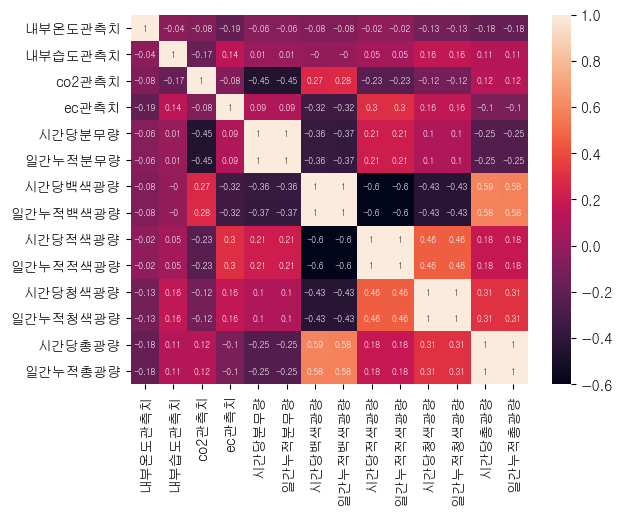

In [24]:
corrdata = t_train.corr(method='pearson').round(2)
sns.heatmap(data=corrdata, annot=True, annot_kws={"size":6})

### 각 컬럼별 독립변수가 타겟 데이터인 종속변수에 미치는 영향 시각화를 통해 확인

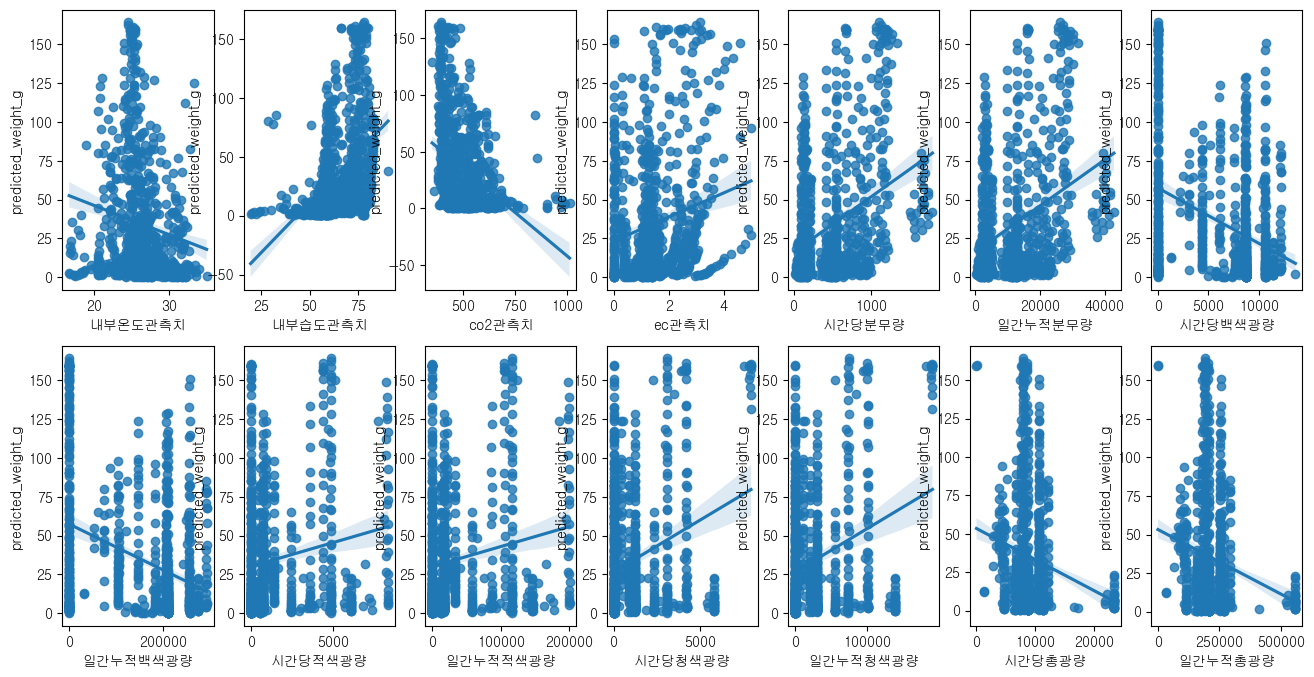

In [23]:

fig, axs = plt.subplots(figsize=(16,8) , ncols=7 , nrows=2)
lm_features = ['내부온도관측치',
               '내부습도관측치',
               'co2관측치',
               'ec관측치',
               '시간당분무량',
               '일간누적분무량',
               '시간당백색광량',
               '일간누적백색광량',
               '시간당적색광량',
               '일간누적적색광량',
               '시간당청색광량',
               '일간누적청색광량',
               '시간당총광량',
               '일간누적총광량']

for i , feature in enumerate(lm_features):
    row = int(i/7)
    col = i%7

    sns.regplot(x=t_train[feature] , y=t_target ,data=t_train , ax=axs[row][col])


### 상관계수가 높은 컬럼 삭제

In [243]:
x_train = t_train.drop(['일간누적분무량', '일간누적백색광량', '일간누적적색광량','일간누적청색광량' ,'일간누적총광량'], axis=1)

<Axes: >

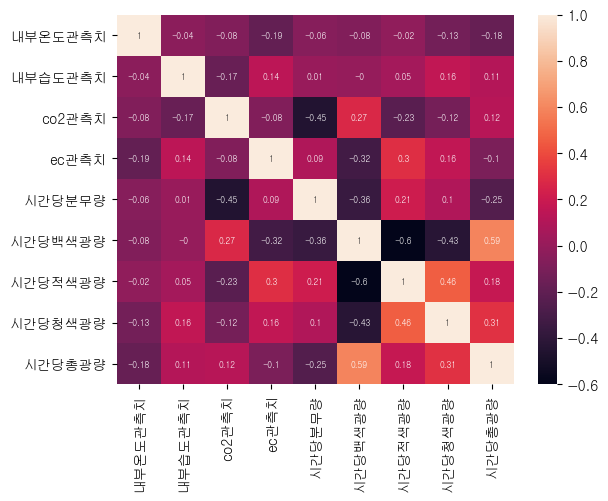

In [244]:
corrdata = x_train.corr(method='pearson').round(2)
sns.heatmap(data=corrdata, annot=True, annot_kws={"size":6})

# 회귀분석

In [283]:
X_data = x_train
y_data = t_target

#### 단순 선형 회귀 모델 - 단순히 전체 피처에 대한 계수를 구한 것

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train , X_test , y_train , y_test = train_test_split(X_data , y_data , test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )

y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 1008.252 , RMSE : 31.753
Variance score : 0.396


#### MSE는 예측 값과 실제 값 간의 차이를 제곱한 후 평균을 구한 값 (예측 오차 크기)

#### RMSE는 MSE에 루트를 씌운 값으로, 실제 값과 예측 값 간의 차이의 제곱 평균의 제곱근(예측 오차의 표준 편차)

- Variance score : 결정계수로 불리며 모델이 얼마나 데이터를 잘 설명하는지에 대한 지표. 1에 가까울수록 모델이 데이터를 잘 설명하고 있다는 의미이고 0에 가까울수록 모델이 데이터를 잘 설명하지 못한다는 것을 의미한다. 0.396으로 모델이 데이터를 상대적으로 잘 설명하지 못함을 나타내고 있음

#### Variance score = 1 - (오차제곱합 / 편차제곱합) 여기서 오차제곱합은 모델이 예측한 값과 실제 값의 차이를 제곱한 후 더한 값이며, 편차제곱합은 실제 값과 실제 값의 평균값의 차이를 제곱한 후 더한 값입니다. 즉, Variance score는 오차제곱합이 편차제곱합 대비 얼마나 작은지를 나타내는 값입니다.

- 절편 값: y절편이라고도 불리며, 회귀 직선이 y축을 지나는 지점의 값입니다. 모든 독립 변수(X)가 0일 때 종속 변수(Y)의 예측치인 y절편을 의미합니다. 이 값이 0이 아니라면 독립 변수와는 관계없이 어떤 값이 더해지거나 빼져서 종속 변수 값이 결정되는 상수 항을 나타냅니다.


- 회귀 계수 값: 독립 변수(X)의 값이 종속 변수(Y)에 미치는 영향력의 크기와 방향을 나타내는 값입니다. 각 독립 변수의 회귀 계수는 해당 독립 변수가 다른 독립 변수들과 함께 종속 변수에 미치는 영향력을 나타냅니다. 
- 회귀 계수가 양수인 경우, 해당 독립 변수가 증가할수록 종속 변수도 증가하며, 
- 음수인 경우, 해당 독립 변수가 증가할수록 종속 변수는 감소합니다.

In [293]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: [10.11396957]
회귀 계수값: [[-1.70000000e+00  1.60000000e+00 -1.00000000e-01  2.30000000e+00
   0.00000000e+00  1.99888906e+11  1.99888906e+11  1.99888906e+11
  -1.99888906e+11]]


#### 회귀 계수를 큰 값 순으로 정렬

In [288]:
coeff = pd.Series(data=np.round(lr.coef_.reshape(-1,),1), index=x_train.columns)
coeff.sort_values(ascending=False)

시간당백색광량    1.998889e+11
시간당적색광량    1.998889e+11
시간당청색광량    1.998889e+11
ec관측치      2.300000e+00
내부습도관측치    1.600000e+00
시간당분무량     0.000000e+00
co2관측치    -1.000000e-01
내부온도관측치   -1.700000e+00
시간당총광량    -1.998889e+11
dtype: float64

#### 5 folds는 교차 검증 기법 중 하나인 k-fold cross validation을 의미
- 전체 데이터를 K개의 부분집합으로 나눈 뒤 그 중 하나를 검증용 데이터셋으로 두고 나머지 k-1개를 학습용 데이터 셋으로 사용하여 모델을 학습하고 검증하는 방법이다.

- 이 과정을 K번 반복하며 각 반복에서 검증용 데이터셋을 바꿔가며 모델을 검증한다 그리고 각 반복에서의 검증 점수의 평균을 최종 검증 점수로 사용한다


#### 5folds를 사용한다는 것은 전체 데이터를 5개의 부분집합으로 나누어 각각을 한 번씩 검증 데이터셋으로 사용하고 나머지 4개의 부분집합을 학습 데이터셋으로 사용하여 총 5번 모델을 학습하고 검증한다는 것
- 이렇게 교차 검증을 수행하는 이유는 데이터가 한쪽에 치우쳐져 있거나, 적은 데이터로 학습을 수행할 때 모델이 과적합되는 것을 방지하고 일반화 성능을 높이기 위해서이다.


In [290]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_data, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [ -1448.98  -1134.8  -12449.04   -784.19  -1164.25]
 5 folds 의 개별 RMSE scores :  [ 38.07  33.69 111.58  28.    34.12]
 5 folds 의 평균 RMSE : 49.090 


- 평균 RMSE가 49.637이므로, 모델의 예측값과 실제값 사이의 차이가 약 49.637% 정도의 오차가 발생

#### 다항 회귀를 이용

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd


y_target = y_data
X_data 

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 2662.794 , RMSE : 51.602
Variance score : -0.595


- Variance score가 음수인 이유는 다항식 회귀모델이 직선보다 훨씬 과적합 되어 예측력 떨어짐

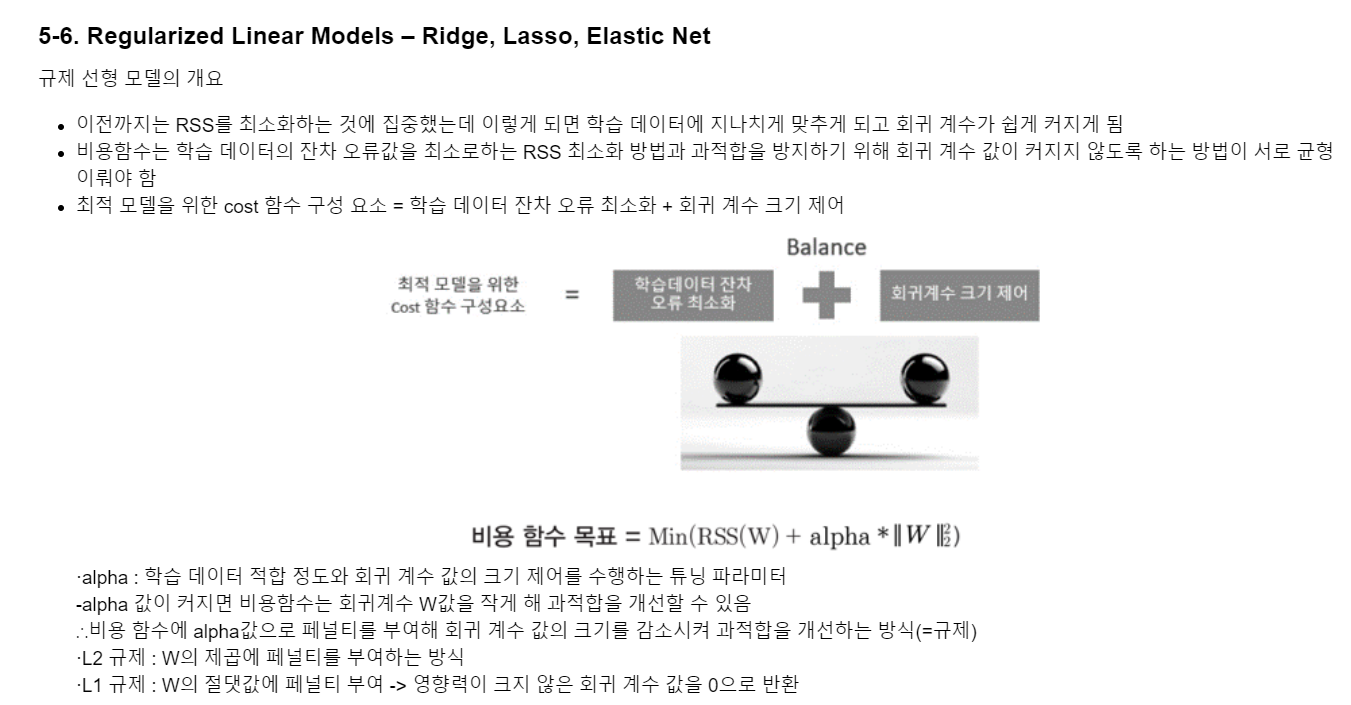

#### Ridge 클래스 구현

In [300]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

y_data
X_data

ridge = Ridge(alpha = 10)

neg_mse_scores = cross_val_score(ridge, X_data, y_data,scoring="neg_mean_squared_error", cv = 5)

rmse_scores = np.sqrt(-1 * neg_mse_scores)

avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [ -1452.748  -1132.181 -12378.339   -791.362  -1187.697]
 5 folds 의 개별 RMSE scores :  [ 38.115  33.648 111.258  28.131  34.463]
 5 folds 의 평균 RMSE : 49.123 


- alpha 값이 크면 규제 강도가 커지므로 모델이 단순해지고, 과적합을 방지할 수 있습니다. 그러나 alpha 값이 너무 크면 모델이 너무 단순해져서 예측 성능이 저하될 수 있습니다. 따라서 적절한 alpha 값을 찾는 것이 중요

#### alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정

In [302]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target,scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 49.138 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 49.166 
alpha 1 일 때 5 folds 의 평균 RMSE : 49.162 
alpha 10 일 때 5 folds 의 평균 RMSE : 49.123 
alpha 100 일 때 5 folds 의 평균 RMSE : 48.789 


C:\Users\kowm6\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.29205e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


#### 각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

In [303]:
X_data.columns

Index(['내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량', '시간당백색광량', '시간당적색광량',
       '시간당청색광량', '시간당총광량'],
      dtype='object')

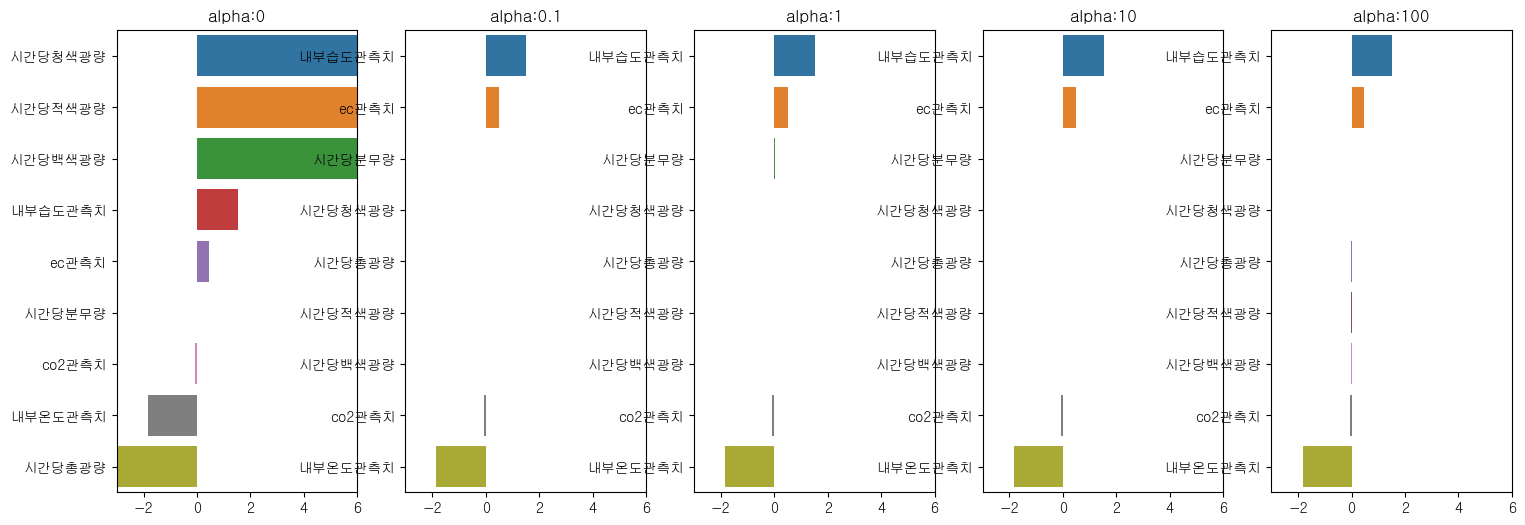

In [304]:
import seaborn as sns

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_data)
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_.reshape(-1), index=x_train.columns)
    colname = f'alpha:{alpha}'
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()


- alpha 값이 증가하면서 회귀계수가 작아지고 있으나 0은 아님

#### alpha값에 따른 회귀계수의 크기가 작다는 것은 해당 독립변수가 종속변수와 상관관계가 적다는 의미가 아니라, 해당 독립변수의 영향력이 낮다는 의미 즉, 해당 독립변수를 모형에서 제외해도 된다는 의미가 아니므로, 0에 가까운 회귀계수를 가진 변수들을 제거하는 것은 적절하지 않음

In [305]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
시간당청색광량,5.056644e+10,0.003357,0.003357,0.003357,0.003361
시간당적색광량,5.056644e+10,-0.002054,-0.002054,-0.002054,-0.002053
시간당백색광량,5.056644e+10,-0.002188,-0.002188,-0.002189,-0.002191
내부습도관측치,1.523364e+00,1.522195,1.522188,1.522116,1.521314
ec관측치,4.652877e-01,0.508315,0.507822,0.502960,0.460544
시간당분무량,1.735256e-02,0.017379,0.017379,0.017382,0.017404
co2관측치,-7.028248e-02,-0.070198,-0.070198,-0.070190,-0.070119
내부온도관측치,-1.850170e+00,-1.847650,-1.847448,-1.845427,-1.825068
시간당총광량,-5.056644e+10,-0.000886,-0.000886,-0.000885,-0.000882


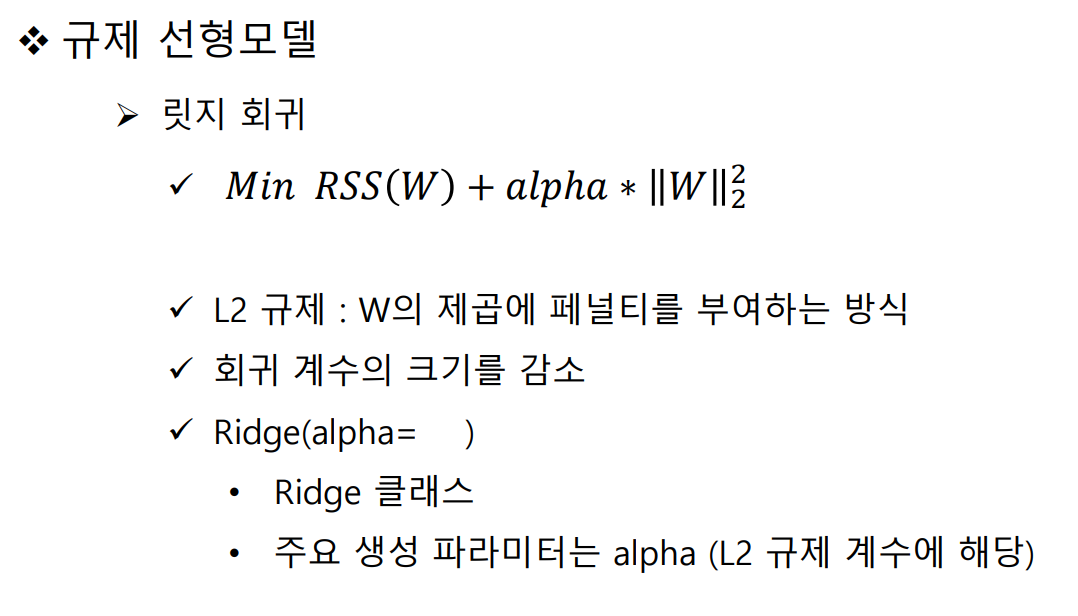

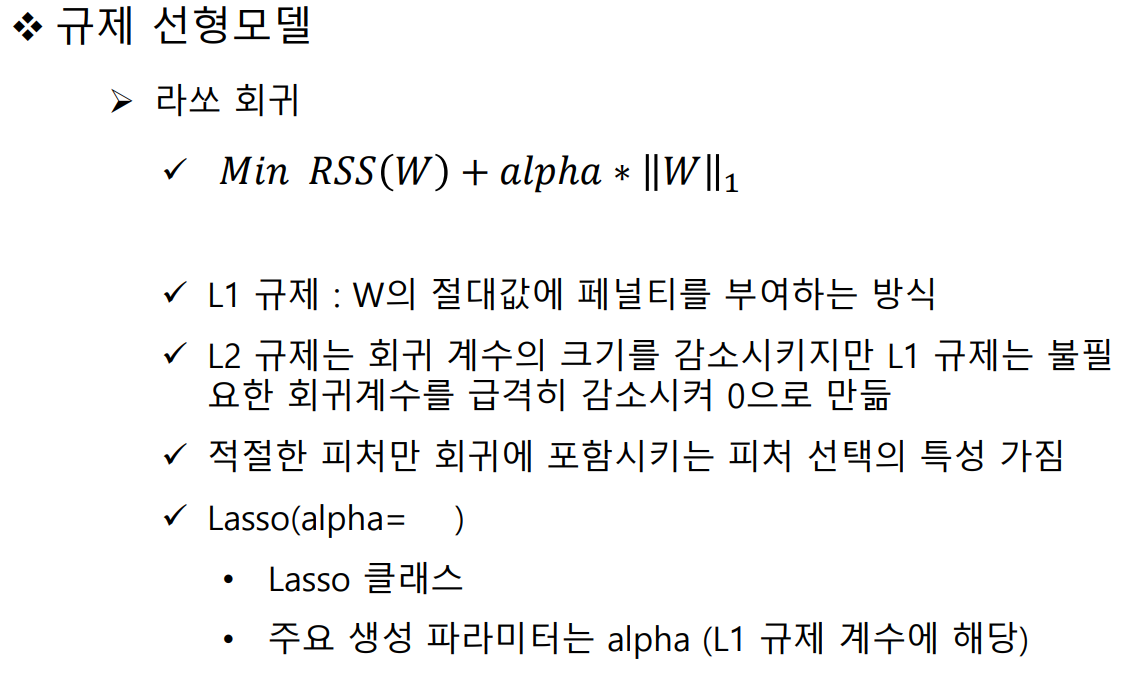

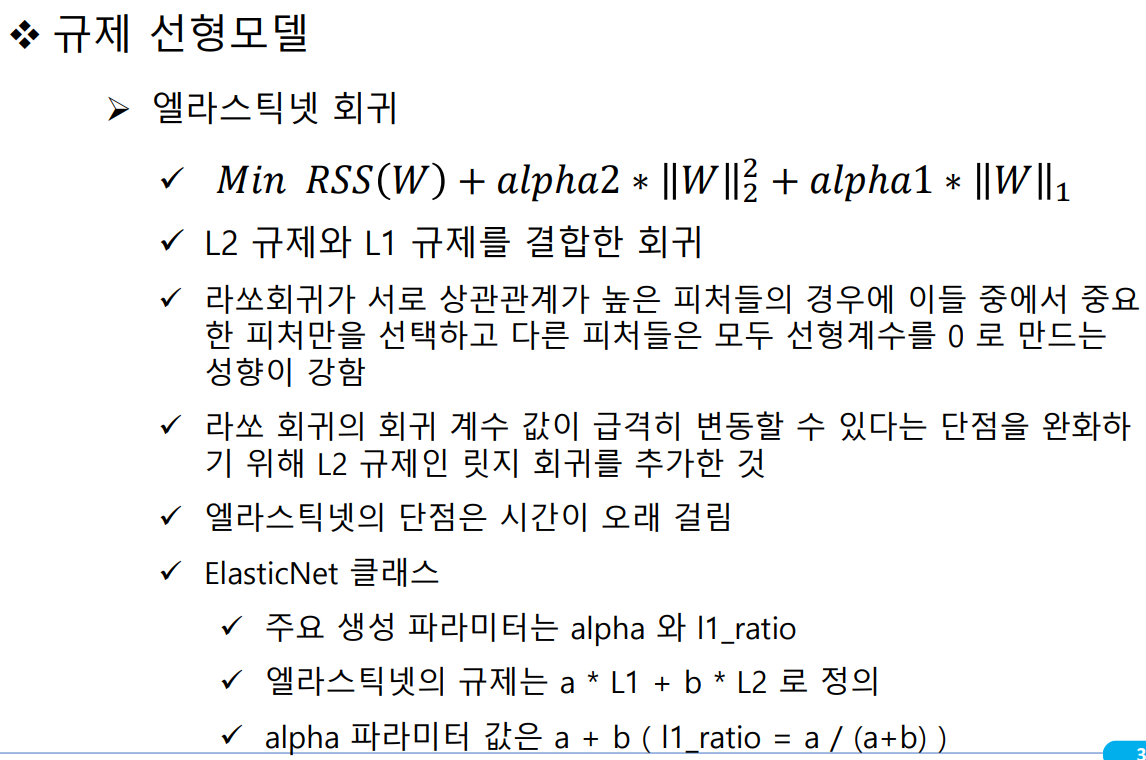

#### 릿지(Ridge): L2 규제를 사용하여 가중치 값을 조정 즉, 가중치 값의 제곱에 대한 패널티를 부여한다. 이 방법은 가중치 값을 0에 가깝게 만들어주는 효과가 있음

#### 라쏘(Lasso): L1 규제를 사용하여 가중치 값을 조정 즉, 가중치 값의 절댓값에 대한 패널티를 부여한다. 이 방법은 가중치 값을 0으로 만드는 효과가 있어서 특성 선택(feature selection)에 유용

##### 엘라스틱넷(Elastic Net): L1과 L2 규제를 함께 사용하여 가중치 값을 조정, 이 방법은 라쏘와 릿지의 장점을 합쳐놓은 것으로, 가중치 값을 0에 가깝게 만들면서 동시에 관련 있는 특성들을 모두 선택한다

In [306]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

# ======
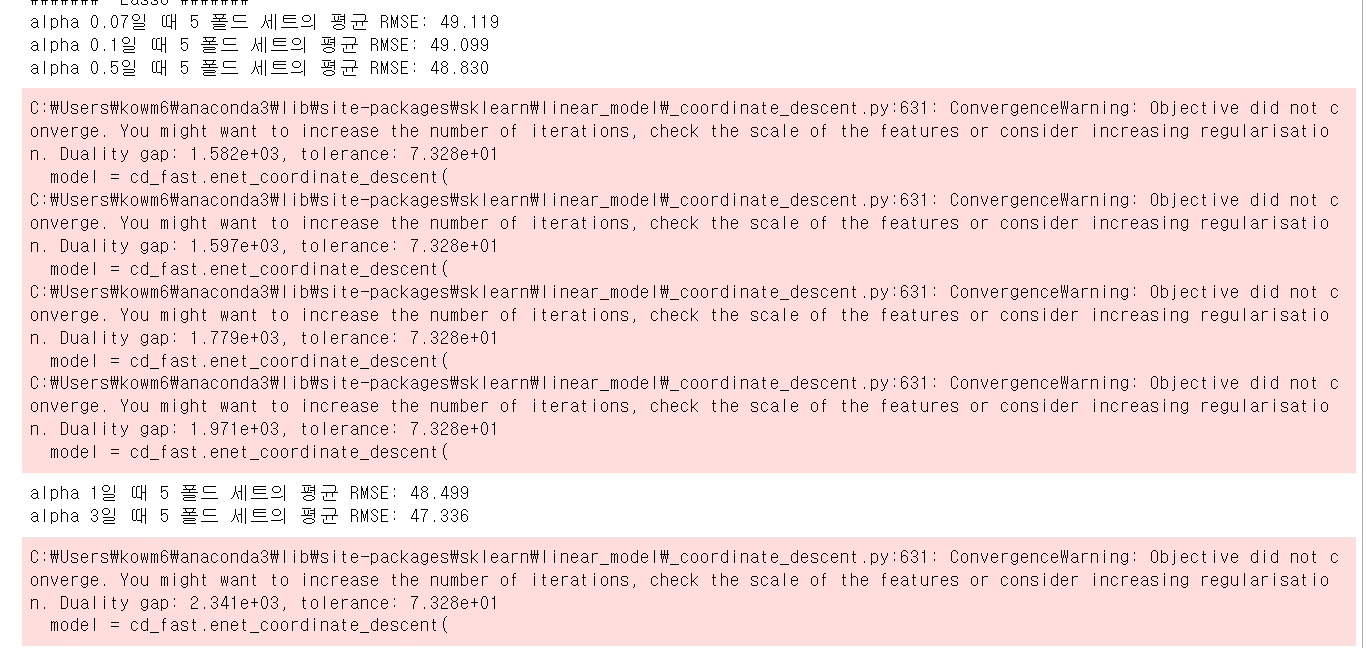
# ======
- 계속 이러한 오류가 뜸

- "Objective did not converge"는 모형 학습 과정에서 최적화 목표 함수가 수렴하지 않았다는 것을 의미, 학습 알고리즘이 수렴하지 않았거나 최적화되지 않은 모델이 생성되었을 가능성이 있음을 나타냄

- 일단 오류 무시 코드를 넣음

In [324]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_data)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 49.119 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 49.099 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 48.830 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 48.499 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 47.336 


- alpha가 컸을 때 그나마 괜찮은 RMSE를 보여줌

In [325]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
내부습도관측치,1.522649,1.522844,1.524894,1.521042,1.505631
ec관측치,0.431321,0.398299,0.000000,0.000000,0.000000
시간당분무량,0.017379,0.017379,0.017384,0.017453,0.017726
시간당청색광량,0.003199,0.003198,0.003187,0.003208,0.003289
시간당총광량,-0.000728,-0.000727,-0.000717,-0.000714,-0.000701
시간당적색광량,-0.002206,-0.002204,-0.002181,-0.002179,-0.002172
시간당백색광량,-0.002350,-0.002353,-0.002384,-0.002377,-0.002347
co2관측치,-0.070160,-0.070143,-0.069926,-0.069723,-0.068911
내부온도관측치,-1.845279,-1.844254,-1.827622,-1.771754,-1.548285


In [326]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)


#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 49.077 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 49.040 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 48.604 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 48.172 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 47.090 


- ElasticNet 또한 alpha 값이 증가함에 따라 RMSE가 점차 낮아짐

In [328]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
내부습도관측치,1.522363,1.522424,1.522651,1.519813,1.501889
ec관측치,0.446935,0.421515,0.126735,0.000000,0.000000
시간당분무량,0.017383,0.017385,0.017416,0.017481,0.017780
시간당청색광량,0.003200,0.003200,0.003200,0.003217,0.003309
시간당총광량,-0.000728,-0.000728,-0.000719,-0.000713,-0.000699
시간당적색광량,-0.002207,-0.002205,-0.002188,-0.002179,-0.002172
시간당백색광량,-0.002349,-0.002350,-0.002371,-0.002373,-0.002340
co2관측치,-0.070158,-0.070141,-0.069921,-0.069686,-0.068902
내부온도관측치,-1.842209,-1.839811,-1.805242,-1.746821,-1.498560


In [347]:
y_data

,predicted_weight_g
0,0.167719
1,0.181787
2,0.265921
3,0.423650
4,0.475272
...,...
779,64.875499
780,74.002614
781,76.342275
782,82.621245


In [278]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # 데이터 준비

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

# # 변환 방법
# def get_scaled_data(method='None', p_degree=None, input_data=None):
#     if method == 'Standard':
#         scaled_data = StandardScaler().fit_transform(input_data)
#     elif method == 'MinMax':
#         scaled_data = MinMaxScaler().fit_transform(input_data)
#     elif method == 'Log':
#         scaled_data = np.log1p(input_data)
#     else:
#         scaled_data = input_data
    
#     if p_degree is not None:
#         scaled_data = PolynomialFeatures(degree=p_degree,
#                                          include_bias=False).fit_transform(scaled_data)
        
#     return scaled_data



In [350]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [399]:
X_data_scaled = get_scaled_data(method='MinMax', p_degree=None, input_data=X_data)

# Ridge 성능 평가

In [351]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]

#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 

scale_methods=[(None, None), ('Standard', None), ('Standard', 2),('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_data, verbose=False, return_coeff=False)
    


(784, 9) (784, 9)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 49.166 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 49.162 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 49.123 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 48.789 
(784, 9) (784, 9)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 49.062 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 48.185 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 42.983 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 36.507 
(784, 54) (784, 9)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 149.362 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 95.967 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 54.026 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 39.561 
(784, 9) (784, 9)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 47.572 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 41.043 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 36.223 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 38.047 
(784, 54) (784, 9)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 47.392 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 41.044 
alpha 10일 때 5 폴드 세

# Lasso 성능 평가

In [352]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Lasso', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(784, 9) (784, 9)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 49.099 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 48.499 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 46.221 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 45.232 
(784, 9) (784, 9)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 47.551 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 36.841 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 38.650 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 40.935 
(784, 54) (784, 9)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 57.772 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 38.624 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 40.648 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 40.935 
(784, 9) (784, 9)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 42.762 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 37.220 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 40.935 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 40.935 
(784, 54) (784, 9)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 38.635 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 36.315 
alpha 10일 때 5 폴드 세트

# ElasticNet 성능 평가

In [353]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]

# 변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2),
                 ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('ElasticNet', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False, return_coeff=False)


(784, 9) (784, 9)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 49.040 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 48.172 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 45.857 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 44.972 
(784, 9) (784, 9)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 40.257 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 35.655 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 39.020 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 40.935 
(784, 54) (784, 9)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 45.205 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 37.071 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 40.034 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 40.935 
(784, 9) (784, 9)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 36.246 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 39.532 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 40.935 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 40.935 
(784, 54) (784, 9)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 35.456 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 38.572 
alpha 10일 때 5 폴드 세트

# Min Max 다항식 스케일

In [420]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data


In [452]:
X_data_scaled = get_scaled_data(method='MinMax', p_degree=2, input_data=X_data)
y_data_scaled = get_scaled_data(method='MinMax', p_degree=2, input_data=y_data)

In [461]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train , X_test , y_train , y_test = train_test_split(X_data_scaled , y_data_scaled, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train)

y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.023 , RMSE : 0.152
Variance score : 0.561


### RMSE 0.152로 비교적 작은 편이지만 variance score 값은 0.561로 중간 정도 예측 성능을 보이고 있음